In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.shape

(150, 6)

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
x = data.loc[ : , 'SepalLengthCm' : 'PetalWidthCm' ]

In [8]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = data['Species']

In [10]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 )

In [12]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
83,6.0,2.7,5.1,1.6
32,5.2,4.1,1.5,0.1
81,5.5,2.4,3.7,1.0
135,7.7,3.0,6.1,2.3
37,4.9,3.1,1.5,0.1


In [13]:
y_train.head()

83     Iris-versicolor
32         Iris-setosa
81     Iris-versicolor
135     Iris-virginica
37         Iris-setosa
Name: Species, dtype: object

In [14]:
print( x_test.shape )
print()
x_test.head()

(30, 4)



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
97,6.2,2.9,4.3,1.3
67,5.8,2.7,4.1,1.0
91,6.1,3.0,4.6,1.4
102,7.1,3.0,5.9,2.1


In [15]:
y_test.head()

100     Iris-virginica
97     Iris-versicolor
67     Iris-versicolor
91     Iris-versicolor
102     Iris-virginica
Name: Species, dtype: object

In [16]:
data.shape

(150, 6)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier( n_neighbors = 5 )

In [20]:
model.fit( x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
y_predict = model.predict( x_test )
y_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score

b = accuracy_score( y_test, y_predict )

b

0.9333333333333333

In [25]:
score = model.score( x_test, y_test )
score

0.9333333333333333

In [26]:
import matplotlib.pyplot as plt

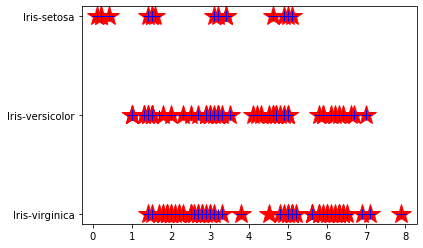

In [30]:
plt.plot( x_test, y_test, color = 'red', marker = '*', markersize = 20, linestyle = '')
plt.plot( x_test, y_predict, color = 'blue', marker = '+', markersize = 10, linestyle = '')

plt.show()

In [37]:
correct = ( 93.34 * len( y_test ) ) /100
incorrect = ( ( 100 - 93.34 ) * len( y_test ) )/100

print( f"Correct = { correct }" )
print( f"InCorrect = { incorrect }" )

Correct = 28.002000000000002
InCorrect = 1.9979999999999989
